In [10]:
# Data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Natural Language Processing (NLP) tools
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

# Text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing  # If needed for LabelEncoder or other utilities

# Dimensionality reduction and visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Model evaluation
from sklearn.metrics import mean_squared_error

# Numerical operations (if append is required later)
from numpy import append


###### imported the libraries required for the following code ########

Task 1:
Read the text data and text pre-processing

Reference for TF-IDF: https://github.com/wjbmattingly/topic_modeling_textbook/blob/main/lessons/02_tf_idf_official.py

In [11]:
# --- Data Loading ---
dataFrame = pd.read_csv("CricketPlayers-1.csv")
descriptions=dataFrame['Description:']                                          # loading the description
names=dataFrame['Type of Players:']
#print(names)
vectorizer = TfidfVectorizer(                                                   # vectorizing
                                lowercase=True,
                                max_features=100,                               # selecting 100 features
                                max_df=0.8,
                                min_df=4,
                                ngram_range = (1,3),
                                stop_words = "english"                          # removes 'and' 'the' ...
                            )
#print(descriptions)
vectors = vectorizer.fit_transform(descriptions)                                # transforming data into vectors

#print(vectors)
feature_names = vectorizer.get_feature_names_out()                              # extracting feature names
#print(feature_names)

dense = vectors.todense()
denselist = dense.tolist()                                                      # converting them into list
#print(denselist)

all_keywords = []

for d in denselist:
    x=0
    keywords = []
    for w in d:
        if w > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)                                               # these are the all keywords we considered
print(descriptions[0])
print(all_keywords[0])
# Create a StandardScaler instance
scaler = StandardScaler(with_mean=False)                                        # with_mean=False to avoid centering around 0

# Fit and transform the TF-IDF features
standardized_tfidf = scaler.fit_transform(vectors)
print(vectors.shape)
#print(len(all_keywords[1]))

print(standardized_tfidf.toarray().shape)       

Career Overview: Sachin Tendulkar, often referred to as the "Little Master" or the "God of Cricket," is one of the most celebrated cricketers of all time. He represented the Indian national team from 1989 to 2013, making him one of the longest-serving international cricketers in history. Tendulkar holds numerous records, including being the highest run-scorer in international cricket.

Playing Style: Tendulkar was renowned for his elegant stroke play, impeccable technique, and remarkable consistency. He possessed a wide range of shots and could adapt his game to all formats. His ability to dominate fast bowlers and spinners alike made him a complete batsman. Tendulkar's balance at the crease and his mastery of both front and back-foot shots were hallmarks of his playing style.

Contributions: Tendulkar's contributions to Indian and world cricket are immense. He played a pivotal role in India's cricketing resurgence during the 1990s and 2000s. His numerous records, including being the f

Task – 2 : Implement PCA   
Reference for Standard PCA code: https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py

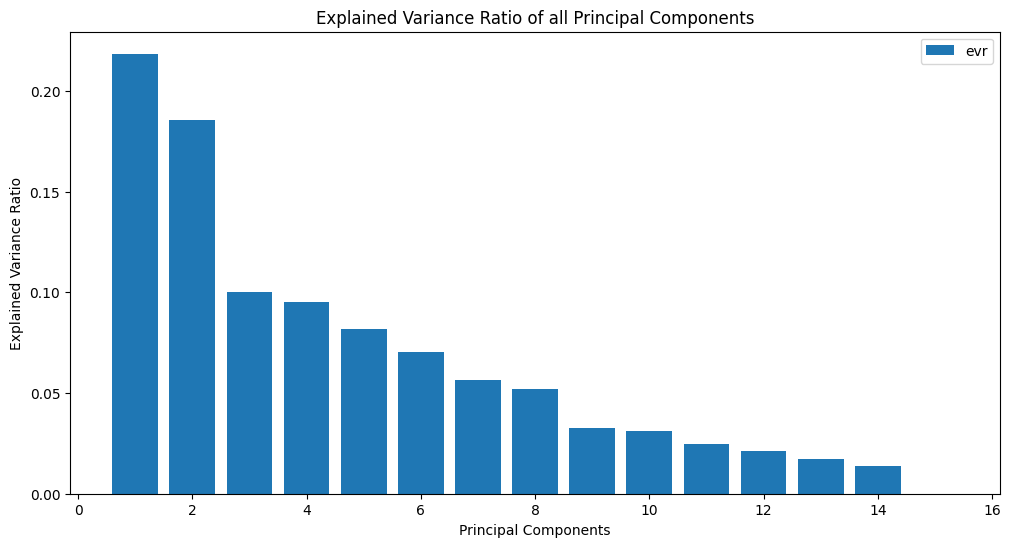

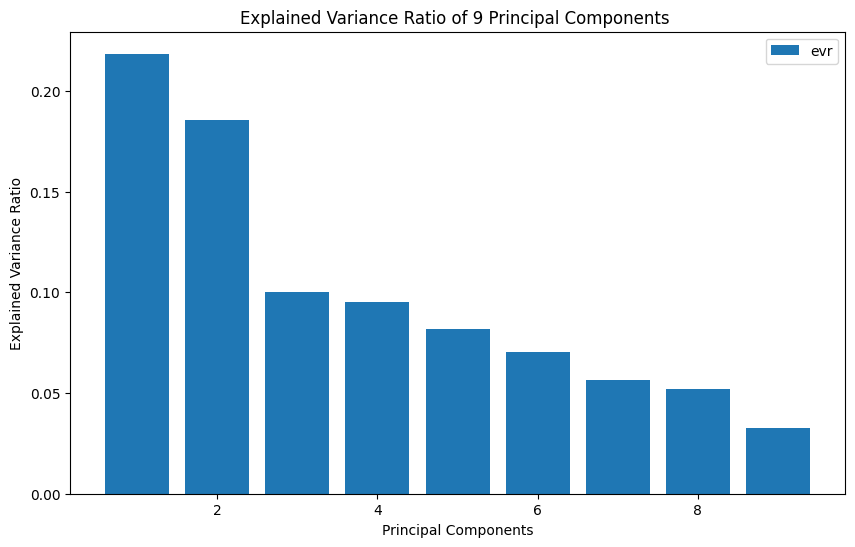

In [12]:
# Creation of PCA and plotting
pca = PCA()                                                                     # create a PCA object
pca.fit(standardized_tfidf.toarray())

evr = pca.explained_variance_ratio_                                             # calculating variance ratio of the data
plt.figure(figsize=(12, 6))                                                     # plotting bar graph for all components
plt.bar(range(1, len(evr) + 1), evr, label='evr')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of all Principal Components')
plt.legend()
plt.show()
 ######################################################################################################
pca2 = PCA(9)                                                                   # create a PCA object with 9 components ## k=9 chosen
pca2.fit(standardized_tfidf.toarray())

pca_data = pca2.transform(standardized_tfidf.toarray())                         # get PCA coordinates for scaled_data

evr2 = pca2.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(evr2) + 1), evr2,label='evr')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of 9 Principal Components ')
plt.legend()
plt.show()

Task – 3 : Projection and Reconstruction

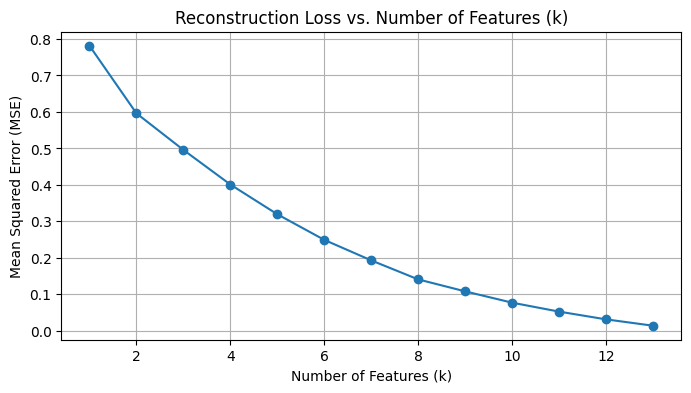

In [13]:
# Reconstruct the TF-IDF data from the 'k' features
tfidf_reconstructed = pca2.inverse_transform(pca_data)
# Calculate MSE between the original TF-IDF features and reconstructed features
mse = mean_squared_error(standardized_tfidf.toarray(), tfidf_reconstructed)

# List to store MSE values for different 'k'
mse_values = []
for k in range(1,14):
    # Initialize PCA with the current 'k' value
    pca = PCA(n_components=k)

    # Fit PCA and project the TF-IDF features into 'k' features
    tfidf_reduced = pca.fit_transform(standardized_tfidf.toarray())

    # Reconstruct the TF-IDF data from the 'k' features
    tfidf_reconstructed = pca.inverse_transform(tfidf_reduced)

    # Calculate MSE and append it to the list
    mse = mean_squared_error(standardized_tfidf.toarray(), tfidf_reconstructed)
    mse_values.append(mse)

# Generate a line plot for reconstruction loss by varying 'k'
plt.figure(figsize=(8, 4))
plt.plot(range(1,14), mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Features (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Reconstruction Loss vs. Number of Features (k)')
plt.grid(True)
plt.show()

**Task - 4: Interpretation of results**

 1. Standardization helps PCA by ensuring that all features contribute more evenly to the principal components, while de-standardization is necessary to interpret the principal components in terms of the original data's scale and units.

 2. Increasing 'k': As we increase 'k,' we retain more principal components, which means we capture more variance in the original data. This leads to higher information retention but also maintains a higher-dimensional representation.


Decreasing 'k': Reducing 'k' decreases the number of retained principal components. While this reduces dimensionality, it also sacrifices some information because we are discarding lower-variance components.

The choice of 'k' should be based on our specific goals. If we want to retain as much information as possible and can handle higher-dimensional data, we may choose a larger 'k.' Conversely, if reducing dimensionality is a priority and we are willing to sacrifice some information, a smaller 'k' may be suitable.

 I chose 'k' value as 9, according to mean squared error graph above, considering 9 principle components leads to 0.1 error, so it is reasonable choice to make. While considering most of principle components.

3. High-weight Terms: Terms with high weights in the principal components have a strong influence on the underlying structure of the data. They are the terms that contribute the most to the variance explained by the selected components.

Interpretation: The interpretation of these terms depends on the specific context of your text data. They could represent keywords, themes, or topics that are prevalent and distinctive in the dataset. Here they are keywords.

Task – 5 : PCA vs t-SNE

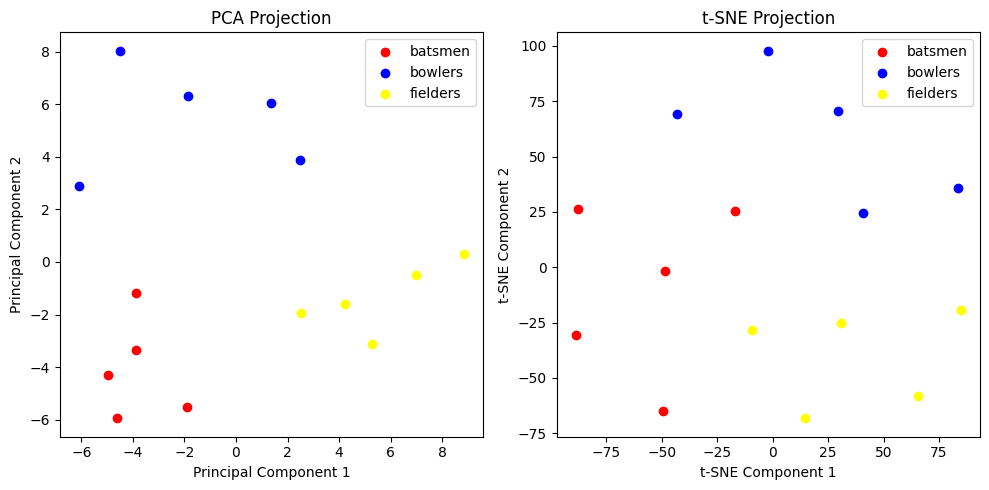

In [14]:
# Apply PCA to reduce to 2 components
data1=standardized_tfidf.toarray()

#print(data.shape)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data1)
#################################################
#print(standardized_tfidf)
# Apply t-SNE to reduce to 2 components
data2=standardized_tfidf.toarray()

tsne = TSNE(n_components=2,  perplexity=12)
tsne_result = tsne.fit_transform(data2)
#print(tsne_result.shape)

#################### Generate scatter plots for PCA and t-SNE projections ####################################################
plt.figure(figsize=(10, 5))
# PCA scatter plot
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:5, 0], pca_result[:5, 1], c="red",label="batsmen")
plt.scatter(pca_result[5:10, 0], pca_result[5:10, 1], c="blue",label="bowlers")
plt.scatter(pca_result[10:15, 0], pca_result[10:15, 1], c="yellow",label="fielders")
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
# t-SNE scatter plot
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:5, 0], tsne_result[:5, 1], c="red",label="batsmen")
plt.scatter(tsne_result[5:10, 0], tsne_result[5:10, 1], c="blue",label="bowlers")
plt.scatter(tsne_result[10:15, 0], tsne_result[10:15, 1], c="yellow",label="fielders")
plt.title('t-SNE Projection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.tight_layout()
plt.show()